In [1145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.stats import zscore

In [1197]:
df = pd.read_csv("datasetnewfinal1.csv")

In [1198]:
df.head

<bound method NDFrame.head of             id                           Model  Year Company     Price  \
0    200716453                Honda N Box 2019  2019   Honda   3750000   
1    200716455         Honda N WGN Custom 2018  2017   Honda   3300000   
2    200716452           Honda S660 Alpha 2017  2017   Honda   3885000   
3    200701070     Honda Fit GP5 RS Grade 2015  2015   Honda   3890000   
4    200716458        Honda Fit GP5 Sport 2014  2014   Honda   3275000   
..         ...                             ...   ...     ...       ...   
517  200492963           Everest Luxury Model   2011    Ford  12000000   
518  200492961                   Fiesta Black   2016    Ford   4250000   
519  200492959    Raptor Ranger Biturbo White   2019    Ford  14700000   
520  200492962           Raptor Ranger Biturbo  2019    Ford  13500000   
521  200495859  Raptor Ranger Bi Turbo Edition  2019    Ford  13500000   

     Engine      FuelType Transmission  Age  Mileage  Unnamed: 10  Unnamed: 11  


In [1199]:
df["Transmission"] = df["Transmission"].astype(str)

In [1200]:
df= df[(df['Year']>=1990)&(df['Year']<=2020)]
print(df.Year)

0      2019
1      2017
2      2017
3      2015
4      2014
       ... 
517    2011
518    2016
519    2019
520    2019
521    2019
Name: Year, Length: 517, dtype: int64


Text(0, 0.5, 'Price')

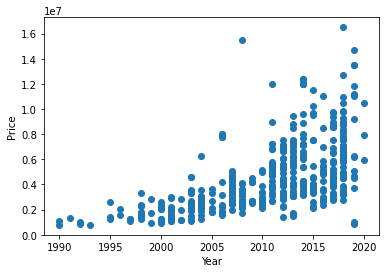

In [1201]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

In [1202]:
df.dtypes

id                int64
Model            object
Year              int64
Company          object
Price             int64
Engine            int64
FuelType         object
Transmission     object
Age               int64
Mileage           int64
Unnamed: 10     float64
Unnamed: 11     float64
dtype: object

In [1203]:
df.dtypes

id                int64
Model            object
Year              int64
Company          object
Price             int64
Engine            int64
FuelType         object
Transmission     object
Age               int64
Mileage           int64
Unnamed: 10     float64
Unnamed: 11     float64
dtype: object

Text(0, 0.5, 'Price')

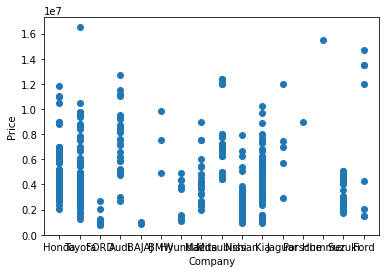

In [1204]:
plt.scatter(df['Company'], df['Price'])
plt.xlabel("Company")
plt.ylabel("Price")

In [1205]:
df = df.astype({"Engine": int, "Age": int})

Text(0, 0.5, 'Price')

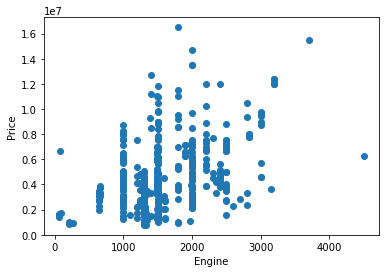

In [1206]:
plt.scatter(df['Engine'], df['Price'])
plt.xlabel("Engine")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

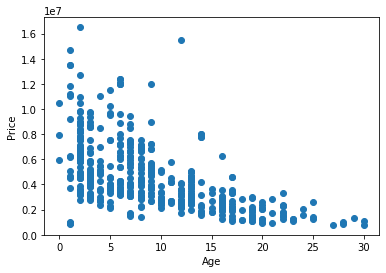

In [1207]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

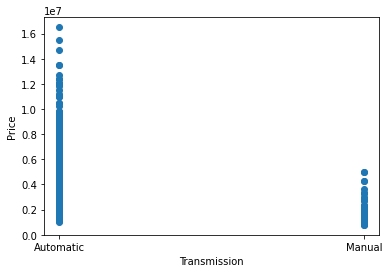

In [1208]:
plt.scatter(df['Transmission'], df['Price'])
plt.xlabel("Transmission")
plt.ylabel("Price")

In [1209]:
df["FuelType"] = df["FuelType"].astype(str)

Text(0, 0.5, 'Price')

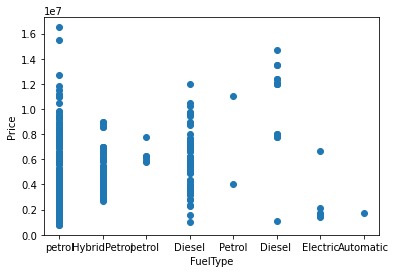

In [1210]:
plt.scatter(df['FuelType'], df['Price'])
plt.xlabel("FuelType")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

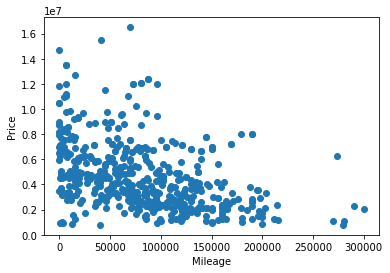

In [1211]:
plt.scatter(df['Mileage'], df['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")

In [1212]:
transmission_types = [x for x in df['Transmission'].unique().tolist()]
print(transmission_types)
fuel_types = [x for x in df['FuelType'].unique().tolist()]
print(fuel_types)
tmission_number = 0

for tmission in transmission_types:
  df['Transmission'] = df['Transmission'].replace({str(tmission): str(tmission_number)})
  tmission_number += 1
ftype_number = 0
for ftype in fuel_types:
  df['FuelType'] = df['FuelType'].replace({str(ftype): str(ftype_number)})
  ftype_number += 1
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].fillna(method='ffill')
df['FuelType'] = df['FuelType'].fillna(method='ffill')
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].astype(float).astype(int)
df['FuelType'] = df['FuelType'].astype(float).astype(int)
print(df.dtypes)
print(df['FuelType'].head)
print(df['Transmission'].head)

['Automatic', 'Manual']
['petrol', 'HybridPetrol', 'petrol ', 'Diesel', 'Petrol', 'Diesel ', 'Electric', 'Automatic']
0
0
0
0
id                int64
Model            object
Year              int64
Company          object
Price             int64
Engine            int32
FuelType          int32
Transmission      int32
Age               int32
Mileage           int64
Unnamed: 10     float64
Unnamed: 11     float64
dtype: object
<bound method NDFrame.head of 0      0
1      0
2      0
3      1
4      1
      ..
517    5
518    0
519    5
520    5
521    5
Name: FuelType, Length: 517, dtype: int32>
<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
517    0
518    0
519    0
520    0
521    0
Name: Transmission, Length: 517, dtype: int32>


In [1213]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Company']= label_encoder.fit_transform(df['Company']) 

df['Company'].unique() 


array([ 5, 15,  3,  0,  1,  2,  7, 10, 11, 12,  9,  8, 13,  6, 14,  4])

In [1214]:
X = df[['Year','Engine','Age','Transmission','Mileage','Company']]
y = df['Price']

In [1215]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [1216]:
print(X_train) 

     Year  Engine  Age  Transmission  Mileage  Company
19   2018    1496    2             0    25000        5
124  1990    1323   30             1   280000        3
207  2012    2500    8             0   105000       11
121  1990    1323   30             1   270000        3
162  2017    1000    3             0    31350        0
..    ...     ...  ...           ...      ...      ...
304  2001    1500   19             0   162500       12
3    2015    1496    5             0    80000        5
153  2018    1000    2             0     9200        0
435  2017    1000    3             0     8000       14
274  2018     650    2             0     7000       12

[413 rows x 6 columns]


In [1217]:
print(X_test)

     Year  Engine  Age  Transmission  Mileage  Company
329  2014    1500    6             0    98000       15
359  2007    1000   13             0   106000       15
137  2015    1800    5             0    61000        0
117  2008    1300   12             0   108000       15
89   2018    1000    2             0     9000       15
..    ...     ...  ...           ...      ...      ...
43   2004    1500   16             0   170998        5
4    2014    1496    6             0    68000        5
365  2010    2000   10             0    90000        9
471  2008    1300   12             0   118000       14
267  2016     650    4             0    46000       12

[104 rows x 6 columns]


In [1218]:
X_test.dtypes

Year            int64
Engine          int32
Age             int32
Transmission    int32
Mileage         int64
Company         int32
dtype: object

In [1219]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1220]:
clf.predict(X_test)

array([4556503.71981966, 1706911.89876807, 6814819.98046005,
       2675687.51629138, 4868964.60179019, 1331441.52624881,
       3576214.34195602, 3248303.9304961 , 4073225.14393437,
        703331.30368173, 4237276.32374859, 4209178.35435379,
       5098024.22368205, 3112441.60918033, 4076746.15349281,
       3819854.75938356, 4874752.20182884, 5792178.35515642,
       6395150.27128398, 4360750.18075275, 1404388.67224014,
       4337146.26976538, 5338836.74244785, 8381012.72650397,
       4043850.27203226, 6079915.25079799, 9210022.50190568,
       -687429.00601768, 4806080.68821073, 3735753.78893709,
       1821074.96611047, 1635474.11381745, 5524974.05795133,
       1685587.72392333, 2967976.15788162, 7008258.34078908,
       5155703.30905151, 5618210.62865531, 6104972.05585086,
       5842789.50124073, 1533915.66114497, 5959346.24204767,
       1609086.07630372, 6680688.69399619, 7086598.38179362,
       8436972.9244554 , 7897684.27018154, 2544370.85124445,
       2620456.85695565,

In [1221]:
print(y_test)

329    3300000
359    2575000
137    9500000
117    3050000
89     4495000
        ...   
43     2650000
4      3275000
365    3890000
471    2700000
267    2650000
Name: Price, Length: 104, dtype: int64


In [1222]:
print(clf.score(X_test, y_test))

0.7053089226728689


In [1223]:
clf.predict([[2025,1000,5,0,200000,9]])

array([6890988.80750263])